## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import scipy
from scipy import stats
from scipy.stats import norm
from math import sqrt

## Reading Dataset 

In [2]:
df=pd.read_csv("train-data.csv")
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

### General Information about Dataset 

In [3]:
df.shape

(6019, 14)

In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Data Cleaning

In [7]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

We can see that the New_price column has too many missing values to be imputed, hence it is wise to drop the column. Another unneccessary column has also been dropped 

In [8]:
df=df.drop(columns="New_Price")
df=df.drop(columns="Unnamed: 0")
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

#### A new column, Brand has been created after extracting the brand name from the Name column

In [9]:
df["Brand"]=df['Name'].apply(lambda x: x.split()[0])
df["Name"]=df['Name'].apply(lambda x: str(x.split(' ',1)[1])) 
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


Certain Brand names had to be rectified

In [10]:
df["Brand"]=df['Brand'].apply(lambda x: 'Land-Rover'  if x=='Land' else x)
df["Brand"]=df['Brand'].apply(lambda x: 'Isuzu'  if x=='ISUZU' else x)
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land-Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

#### Next, we move the units in the numeric columns to the headings in order to more efficiently perform calculations on them

In [11]:
#removing CC from engine and moving it to heading
df["Engine"]=df['Engine'].apply(lambda x: str(x).split()[0])
df.rename(columns = {'Engine':'Engine(cc)'}, inplace = True) 
df["Mileage"]=df['Mileage'].apply(lambda x: str(x).split()[0])
df.rename(columns = {'Mileage':'Mileage(kmpl)'}, inplace = True) 
df["Power"]=df['Power'].apply(lambda x: str(x).split()[0])
df.rename(columns = {'Power':'Power(bhp)'}, inplace = True) 
df.rename(columns = {'Price':'Price(lakhs)'}, inplace = True) 
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price(lakhs),Brand
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


#### The renamed columns were converted to numeric
Some null values had to be removed from Power

In [12]:
x = 'n'
count = 0
position = []
for i in range(df.shape[0]):
    if df['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(count)
df = df.drop(df.index[position])
df= df.reset_index(drop=True)

107


In [13]:
df=df.astype({"Engine(cc)":float})
df=df.astype({"Mileage(kmpl)":float})
df=df.astype({"Power(bhp)":float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5912 non-null   object 
 1   Location           5912 non-null   object 
 2   Year               5912 non-null   int64  
 3   Kilometers_Driven  5912 non-null   int64  
 4   Fuel_Type          5912 non-null   object 
 5   Transmission       5912 non-null   object 
 6   Owner_Type         5912 non-null   object 
 7   Mileage(kmpl)      5910 non-null   float64
 8   Engine(cc)         5876 non-null   float64
 9   Power(bhp)         5876 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price(lakhs)       5912 non-null   float64
 12  Brand              5912 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 600.6+ KB


## Missing Values 

In [14]:
df.isnull().sum().sum()

112

In [15]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage(kmpl)         2
Engine(cc)           36
Power(bhp)           36
Seats                38
Price(lakhs)          0
Brand                 0
dtype: int64

Text(0.5, 1, 'Heatmap showing missing values-before cleaning')

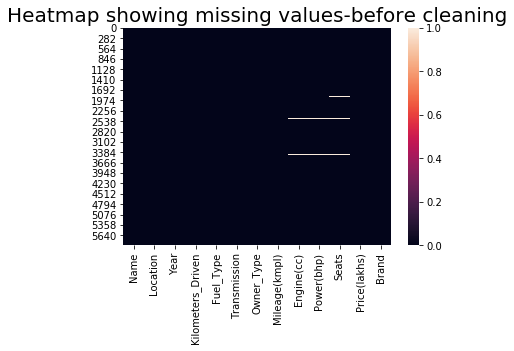

In [16]:
sns.heatmap(df.isnull())
plt.title('Heatmap showing missing values-before cleaning', fontsize = 20)

#### The missing/null values of each numeric column are replaced with mode of that column according to each Brand

In [17]:
#Function to replace na value with mode of that specific brand for seats
def fill_na_with_mode(ds, brandname):
  fill_value = ds.loc[ds['Brand'] == brandname]['Seats'].mode()[0]
  condit = ((ds['Brand'] == brandname) & (ds['Seats'].isnull()))
  ds.loc[condit, 'Seats'] = ds.loc[condit, 'Seats'].fillna(fill_value)

In [18]:
b=df["Brand"].unique()
for c in b:
  fill_na_with_mode(df, c) 

In [19]:
#Mileage cannot be 0, filling in according to mode of each brand
zero_mil = df.loc[df['Mileage(kmpl)'] == 0.0]['Brand'].unique()
for m in zero_mil:
  fill_zero = df.loc[df['Brand'] == m]['Mileage(kmpl)'].mode()[0]
  con = ((df['Brand'] == m) & (df['Mileage(kmpl)'] == 0.0))
  df.loc[con, 'Mileage(kmpl)'] = fill_zero

In [20]:
#Function to replace na value with mode of that specific brand
def fill_na_with_mode(ds, brandname, colname):
  fill_value = ds.loc[ds['Brand'] == brandname][colname].mode()[0]
  condit = ((ds['Brand'] == brandname) & (ds[colname].isnull()))
  ds.loc[condit, colname] = ds.loc[condit, colname].fillna(fill_value)

In [21]:
miss_Mil = df.loc[df['Mileage(kmpl)'].isnull()]['Brand'].unique()
miss_Eng = df.loc[df['Engine(cc)'].isnull()]['Brand'].unique()
miss_Pow = df.loc[df['Power(bhp)'].isnull()]['Brand'].unique()

for x in miss_Mil:
  fill_na_with_mode(df, x, 'Mileage(kmpl)')
for y in miss_Eng:
  fill_na_with_mode(df, y, 'Engine(cc)')
for z in miss_Pow:
  fill_na_with_mode(df, z, 'Power(bhp)')
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage(kmpl)        0
Engine(cc)           0
Power(bhp)           0
Seats                0
Price(lakhs)         0
Brand                0
dtype: int64

Text(0.5, 1, 'Heatmap showing missing values-after cleaning')

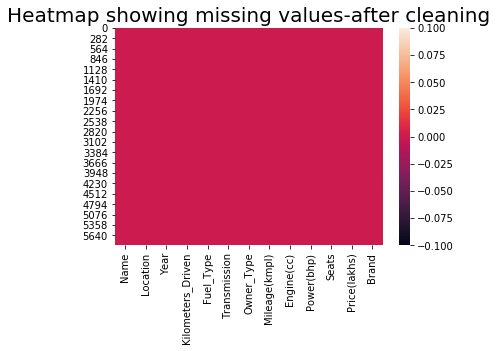

In [22]:
sns.heatmap(df.isnull())
plt.title('Heatmap showing missing values-after cleaning', fontsize = 20)

In [23]:
df = df[df["Kilometers_Driven"] != df["Kilometers_Driven"].max()]

## Data Visualisation

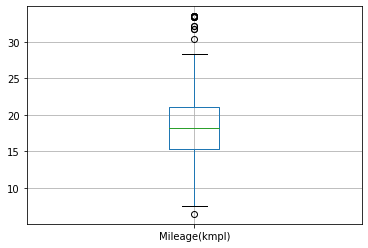

In [24]:
df.reset_index(inplace=True)
df.boxplot(column=['Mileage(kmpl)'])

Mileage is concentrated between 15-21 kmpl

From the above two boxplots we can see that the Mileage(kmpl) and Price(lakhs) column have some outliers

<Figure size 1440x720 with 0 Axes>

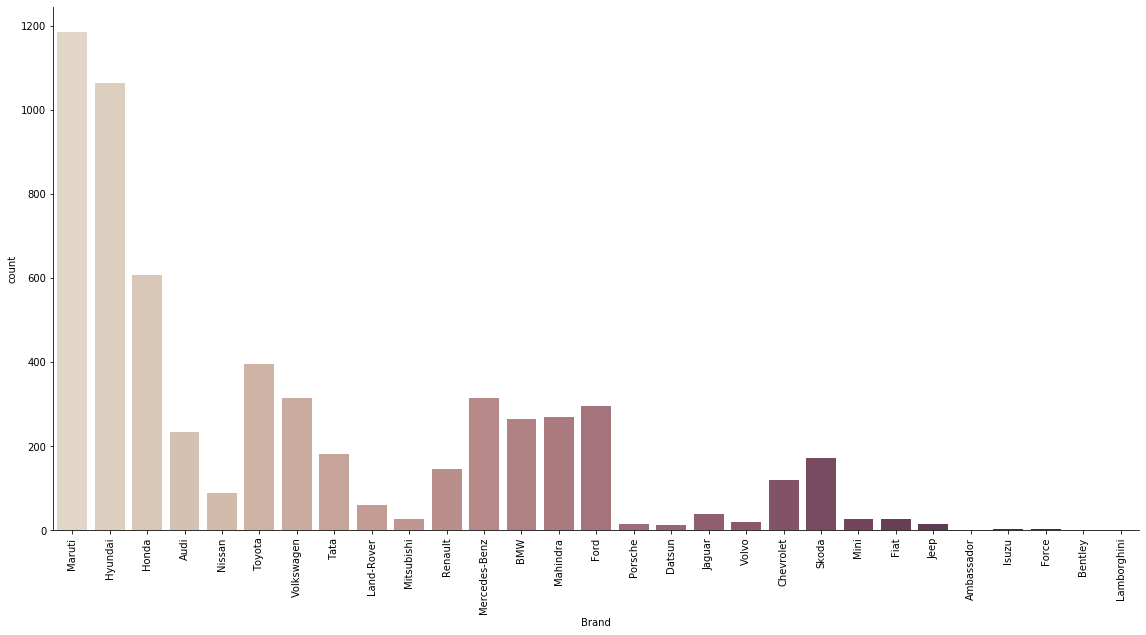

In [26]:
plt.figure(figsize=(20, 10))
sns.catplot(x="Brand", kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

Maruti is the most popular brand followed by Hyundai

<Figure size 720x360 with 0 Axes>

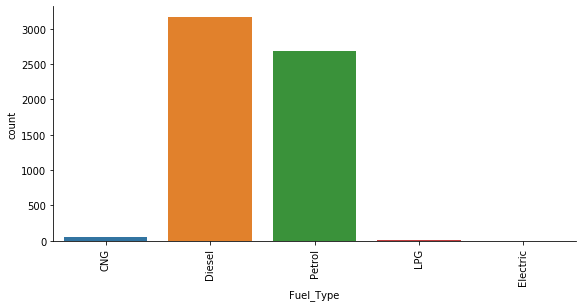

In [27]:
plt.figure(figsize=(10, 5))
sns.catplot(x="Fuel_Type", kind="count", height=4, aspect=2, data=df);
plt.xticks(rotation=90);

Diesel cars are the most common followed by petrol cars

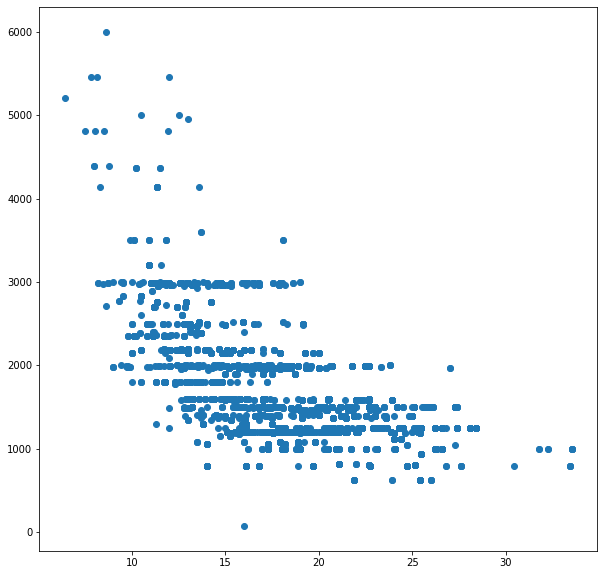

In [28]:
fig , ax = plt.subplots(figsize=(10,10))
ax.scatter(df["Mileage(kmpl)"],df["Engine(cc)"]);

From the above plot we can understand that generally in cars the Mileage increases with the decrease in Engine(cc)

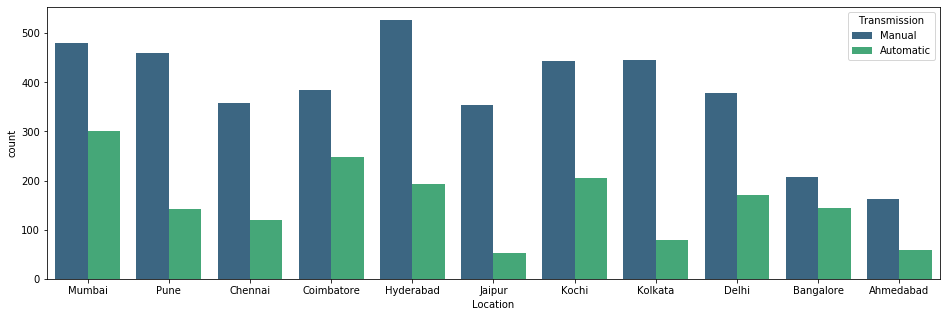

In [29]:
plt.figure(figsize=(16,5))
sns.countplot(x="Location" ,data=df,hue="Transmission", palette='viridis');

From the above plot we can infer that the ratio of manual to auto is highest in hyderabad whereas it is the smallest in bangalore 
This tells us that that more people tend to use automatic in bangalore(mostly because of the high traffic problems)

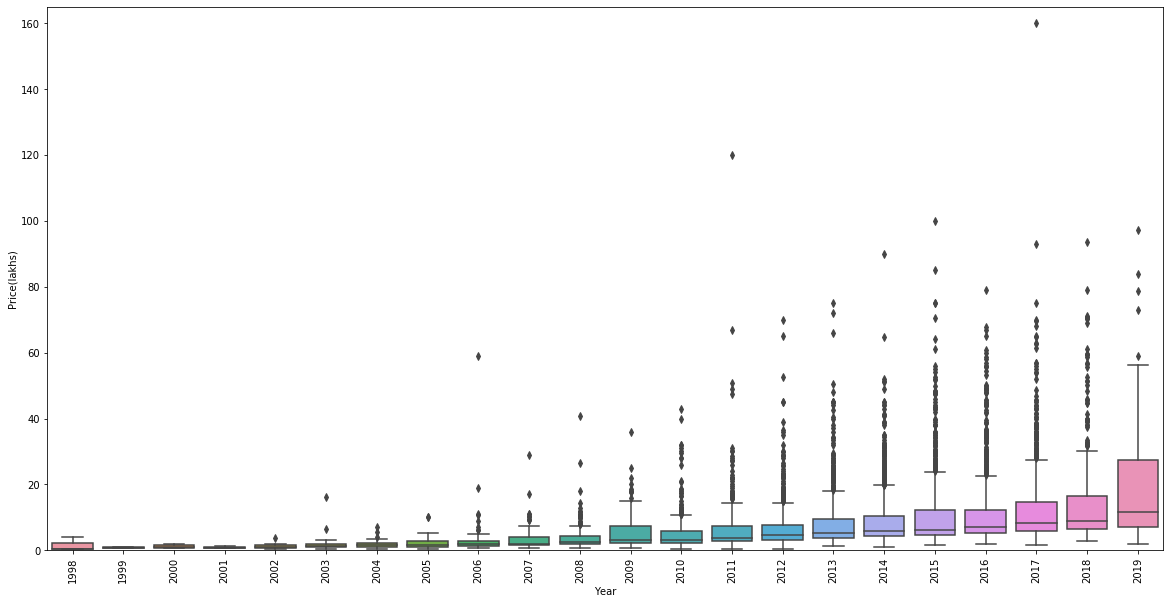

In [30]:
data = pd.concat([df['Price(lakhs)'], df["Year"]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="Year", y="Price(lakhs)", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Price of newer models is high compared to older models

<Figure size 3600x720 with 0 Axes>

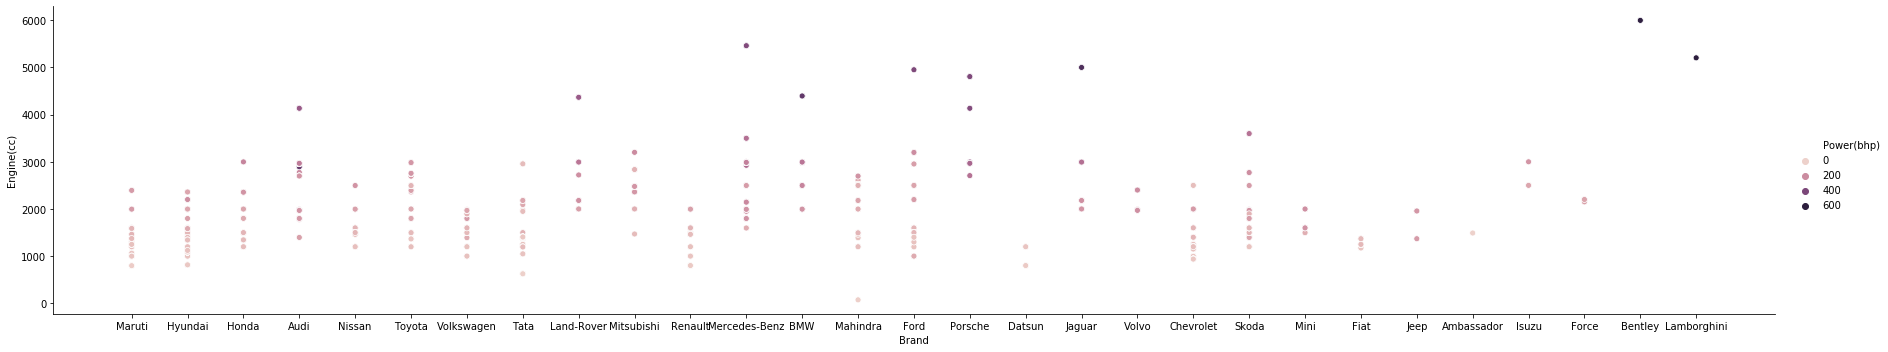

In [31]:
plt.figure(figsize=(50,10))
sns.relplot(data=df, x="Brand", y="Engine(cc)", hue="Power(bhp)",height=5,aspect=5)

The above plot shows how each brand's engines work i.e how much power do they give correspnding to the engine

## Normalisation

In [32]:
df=df.drop(columns="index")
df.var()

Year                 1.016700e+01
Kilometers_Driven    1.424507e+09
Mileage(kmpl)        1.744071e+01
Engine(cc)           3.606563e+05
Power(bhp)           2.894310e+03
Seats                6.448924e-01
Price(lakhs)         1.256975e+02
dtype: float64

In [33]:
df.mean()

Year                  2013.450008
Kilometers_Driven    57287.886652
Mileage(kmpl)           18.344805
Engine(cc)            1624.443411
Power(bhp)             113.189829
Seats                    5.282186
Price(lakhs)             9.575544
dtype: float64

In [34]:
from sklearn.preprocessing import normalize
norm_df=df.copy()
for i in (['Year','Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)','Seats','Price(lakhs)']):
    norm_df[i]=norm_df[i]/norm_df[i].abs().max()
    

In [35]:
norm_df.var()

Year                 0.000002
Kilometers_Driven    0.002372
Mileage(kmpl)        0.015504
Engine(cc)           0.010025
Power(bhp)           0.009229
Seats                0.006449
Price(lakhs)         0.004910
dtype: float64

In [36]:
norm_df.mean()

Year                 0.997251
Kilometers_Driven    0.073920
Mileage(kmpl)        0.546953
Engine(cc)           0.270831
Power(bhp)           0.202125
Seats                0.528219
Price(lakhs)         0.059847
dtype: float64

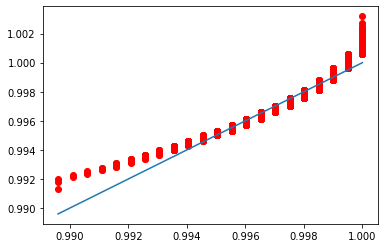

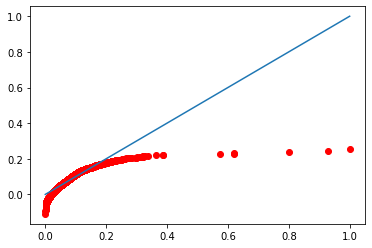

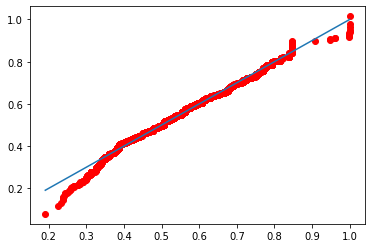

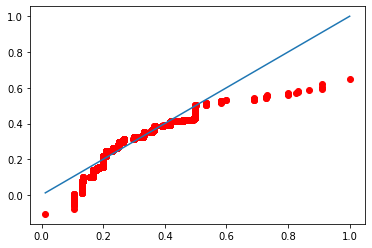

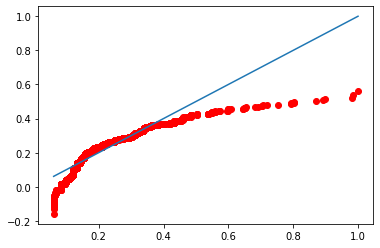

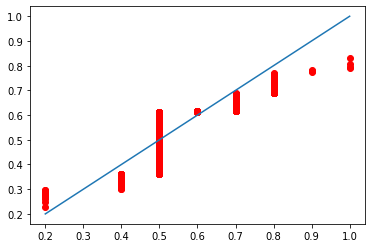

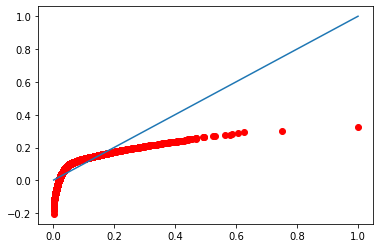

In [37]:
def normality_check(data):
    pos =[]
    th_Q =[]
    data = np.sort(np.array(data))
    pos = [(i - 0.5)/len(data) for i in range(1, len(data)+1)]
    th_Q = [norm.ppf(i, np.mean(data), np.std(data, ddof = 1)) for i in pos]
    plt.plot(data, th_Q, 'ro', data, data)
    plt.show()
for i in (['Year','Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)','Seats','Price(lakhs)']):
    normality_check(norm_df[i])


## Standardisation

In [38]:
from numpy import asarray
from sklearn.preprocessing import *
stan_df=df.copy()
for j in ['Year','Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)','Seats','Price(lakhs)']:
    r_scaler = preprocessing.StandardScaler()
    df_r = r_scaler.fit_transform(stan_df[[j]])
    #df_r=stats.zscore(stan_df[[j]])
    stan_df[j]=df_r

    

In [39]:
stan_df.mean().round().abs()

Year                 0.0
Kilometers_Driven    0.0
Mileage(kmpl)        0.0
Engine(cc)           0.0
Power(bhp)           0.0
Seats                0.0
Price(lakhs)         0.0
dtype: float64

In [40]:
stan_df.var().round()

Year                 1.0
Kilometers_Driven    1.0
Mileage(kmpl)        1.0
Engine(cc)           1.0
Power(bhp)           1.0
Seats                1.0
Price(lakhs)         1.0
dtype: float64

Year


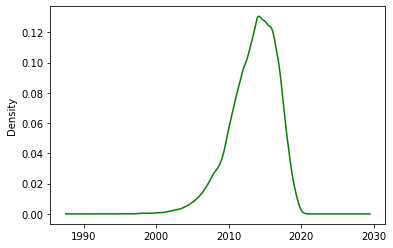

Kilometers_Driven


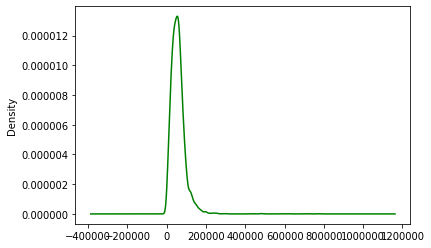

Mileage(kmpl)


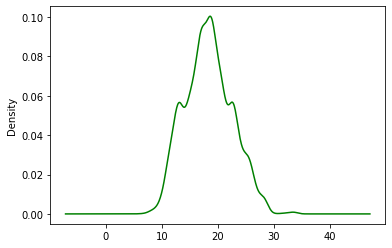

Engine(cc)


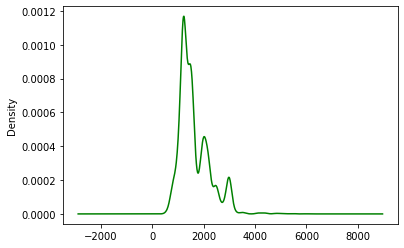

Power(bhp)


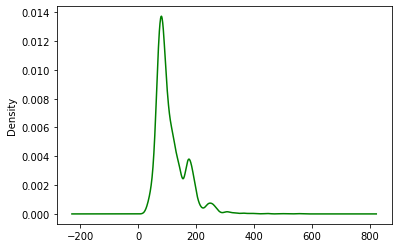

Seats


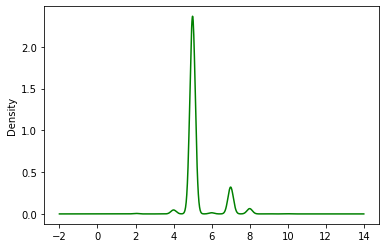

Price(lakhs)


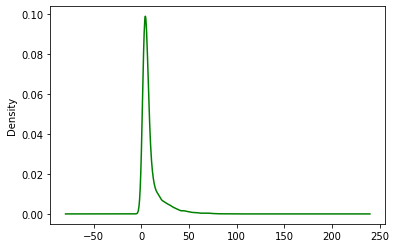

In [41]:
for k in ['Year','Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)','Seats','Price(lakhs)']:
    df[k].plot(kind='kde',color="green")
    print(k)
    plt.show()

Year


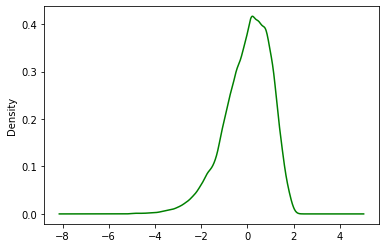

Kilometers_Driven


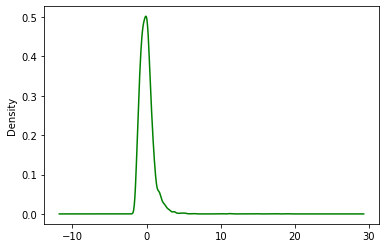

Mileage(kmpl)


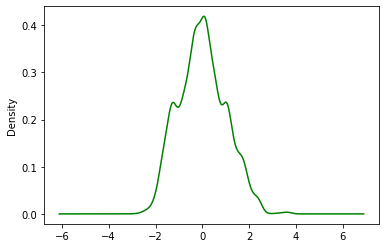

Engine(cc)


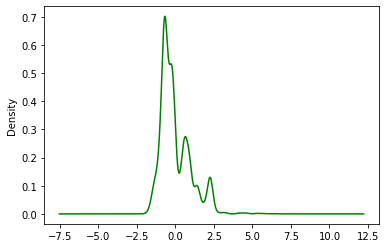

Power(bhp)


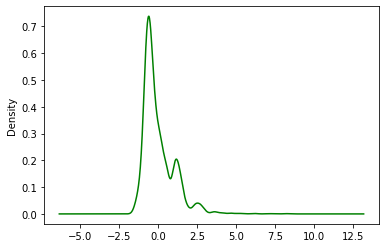

Seats


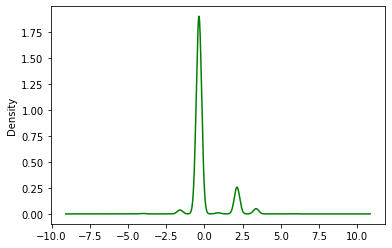

Price(lakhs)


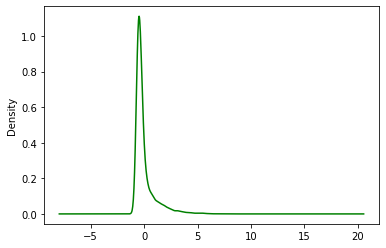

In [42]:
for k in ['Year','Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)','Seats','Price(lakhs)']:
    stan_df[k].plot(kind='kde',color="green")
    print(k)
    plt.show()

## Hypothesis Testing

We wanted to check if the transmission type(Manual/Automatic) had any adverse effect on the Mileage(kmpl) of the car

#### Research hypothesis:
Null hypothesis H0: 2 independent samples of Mileage in kmpl (grouped by vehicle transmission) have identical average (xbar1 = xbar2)

Alternative hypothesis Ha: 2 independent samples of Mileage in kmpl (grouped by vehicle transmission)  DO NOT have identical average (xbar1 != xbar2)

Consider significance level alpha as 0.05 (Confidence level 95%),

In [43]:
sample_1=df['Mileage(kmpl)'][df['Transmission']=='Manual'].sample(n=30)
sample_2=df['Mileage(kmpl)'][df['Transmission']=='Automatic'].sample(n=30)

#### Performing T-test for the means of two independent samples of scores
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values

In [44]:
t_stat, p_val=scipy.stats.ttest_ind(sample_1,sample_2,equal_var=False)

In [45]:
print("T statistic: ",round(t_stat,5),"\nP value: ",round(p_val,5))

T statistic:  4.09389 
P value:  0.00014


We can see that p value < alpha, hence we reject the null hypothesis and conclude that the average value of Mileage(kmpl) in samples of those with Manual transmission are NOT identical to average value of Mileage(kmpl) in samples of those with Automatic transmission. Hence H0 is rejected and Ha is accepeted.

## Correlation Heatmap

(7.5, -0.5)

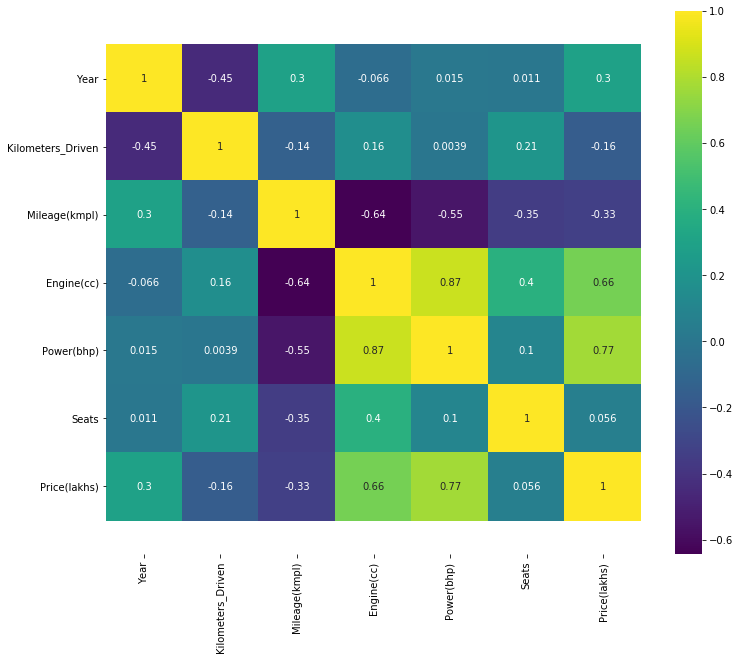

In [46]:
correl=df.corr(method='pearson')
plt.subplots(figsize=(12,10))
fig1=sns.heatmap(correl, cmap='viridis',annot=True)
bottom, top = fig1.get_ylim()
fig1.set_ylim(bottom + 0.5, top - 0.5)

#### Insights
1. The columns with the highest positive correlation are Engine(cc) and Power(bhp)
2. The columns with the highest negative correlation are Engine(cc) and Mileage(kmpl)

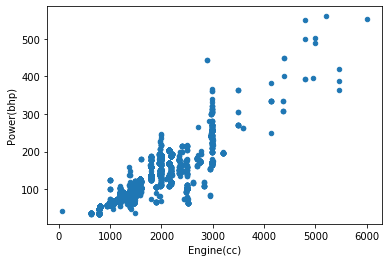

In [47]:
df.plot.scatter(x='Engine(cc)',y='Power(bhp)')

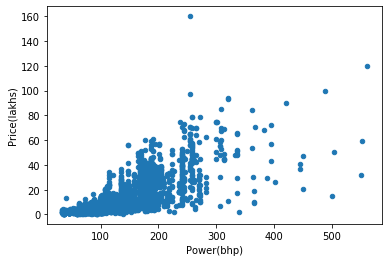

In [48]:
df.plot.scatter(y='Price(lakhs)',x='Power(bhp)')